In [49]:
import numpy as np
from generator.change_point_generator import ChangePointGenerator
from detector.cusum import CUSUM_Detector, ProbCUSUM_Detector, ChartCUSUM_Detector

# Abrupt Shift

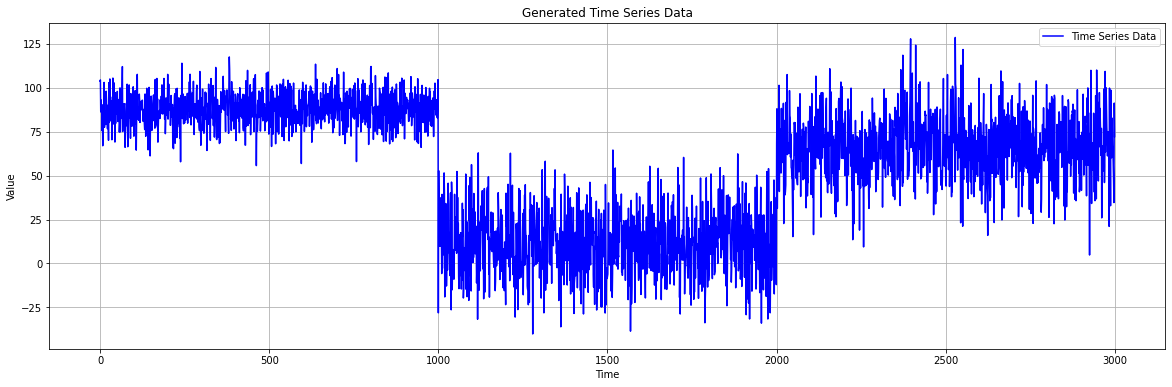

In [51]:
# Generate time series data with change points
generator = ChangePointGenerator(num_segments=3, segment_length=1000, change_point_type='sudden_shift')
generator.generate_data()

# Plot the generated data
generator.plot_data()

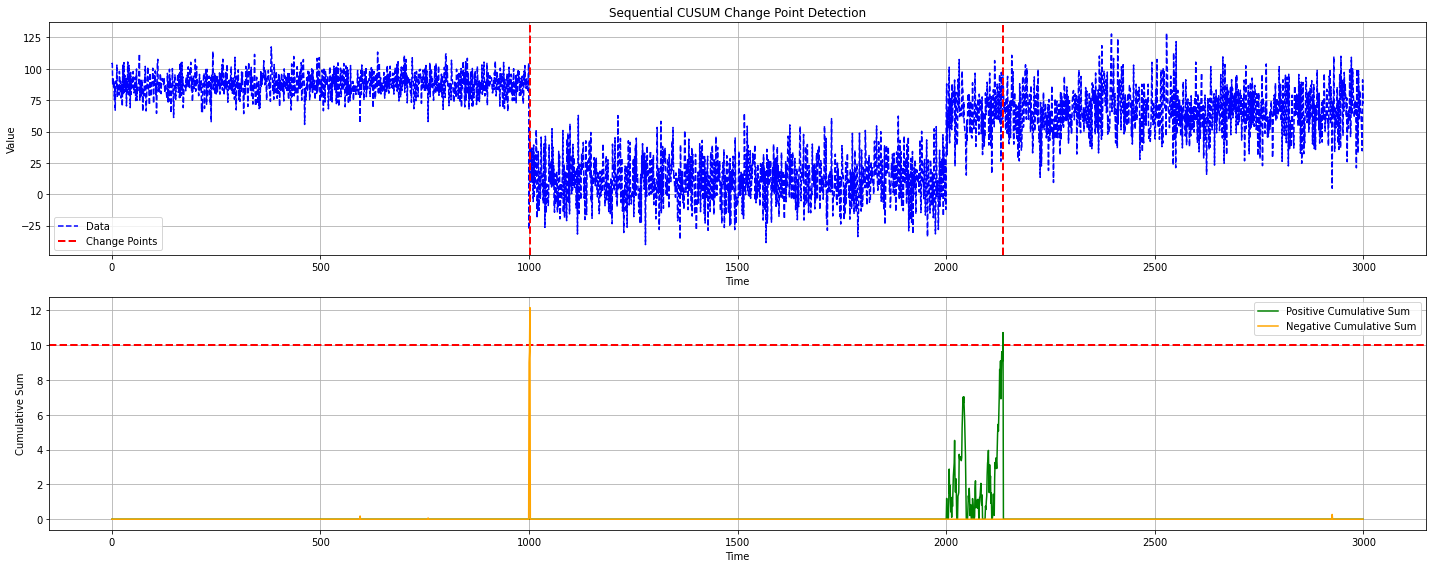

In [52]:
# Detect change points using CUSUM Detector
cusum_detector = CUSUM_Detector(warmup_period=500, delta=3, threshold=10)
cusum_pos_changes, cusum_neg_changes, cusum_change_points = cusum_detector.detect_change_points(np.array(generator.data))

# Plot the detected change points using CUSUM Detector
cusum_detector.plot_change_points(generator.data, cusum_change_points, cusum_pos_changes, cusum_neg_changes)

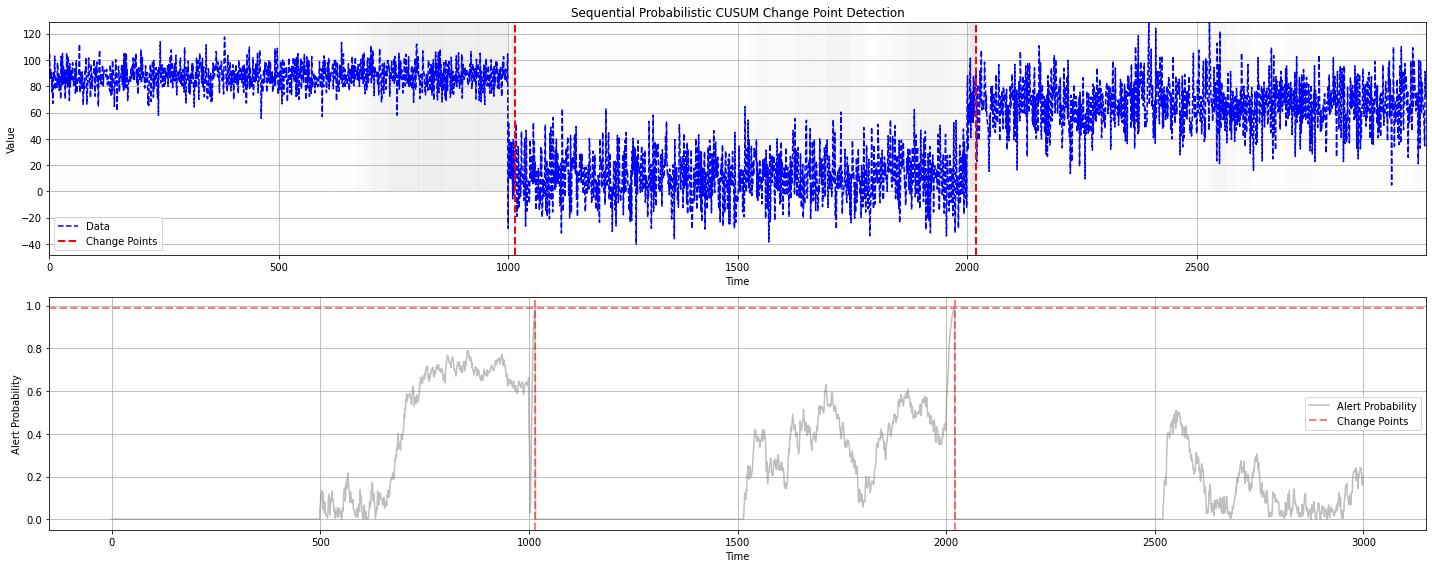

In [53]:
# Detect change points using Probabilistic CUSUM Detector
prob_cusum_detector = ProbCUSUM_Detector(warmup_period=500, threshold_probability=0.01)
prob_probabilities, prob_change_points = prob_cusum_detector.detect_change_points(np.array(generator.data))

# Plot the detected change points using Probabilistic CUSUM Detector
prob_cusum_detector.plot_change_points(generator.data, prob_change_points, prob_probabilities)

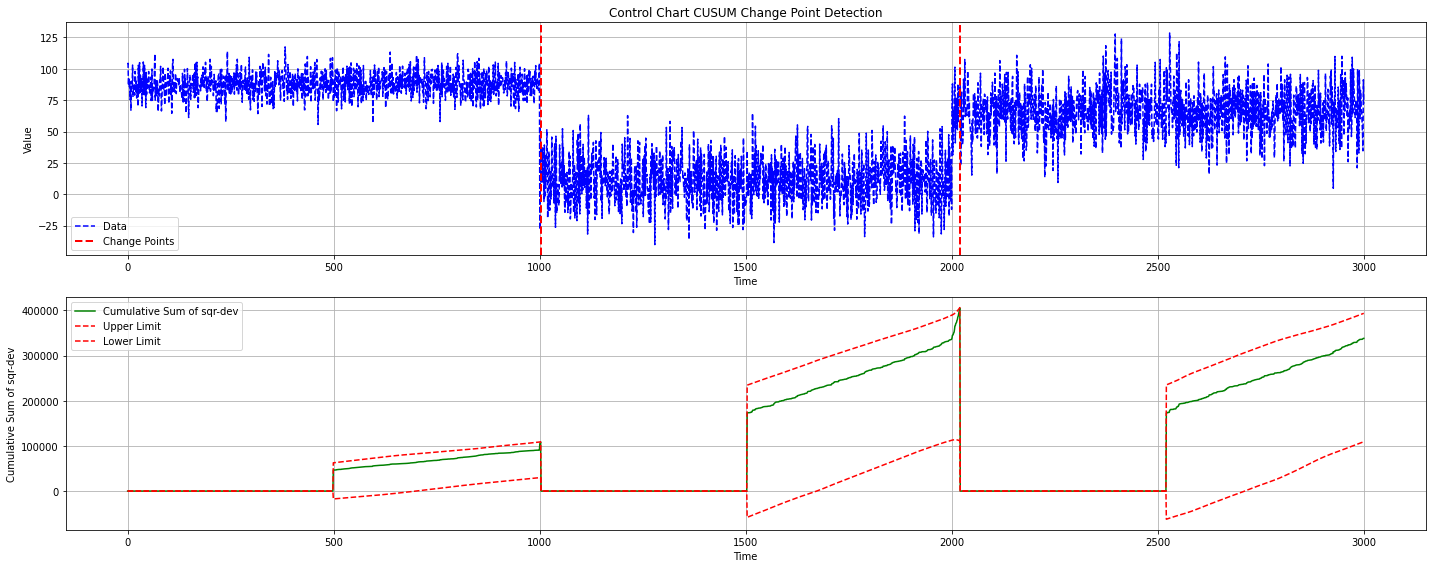

In [54]:
# Detect change points using Control Chart CUSUM Detector
chart_cusum_detector = ChartCUSUM_Detector(warmup_period=500, level=3, deviation_type='sqr-dev')
upper_limits, lower_limits, cusums, change_points = chart_cusum_detector.detect_change_points(np.array(generator.data))

# Plot the detected change points using Control Chart CUSUM Detector
chart_cusum_detector.plot_change_points(np.array(generator.data), change_points, cusums, upper_limits, lower_limits)

# Gradual drift

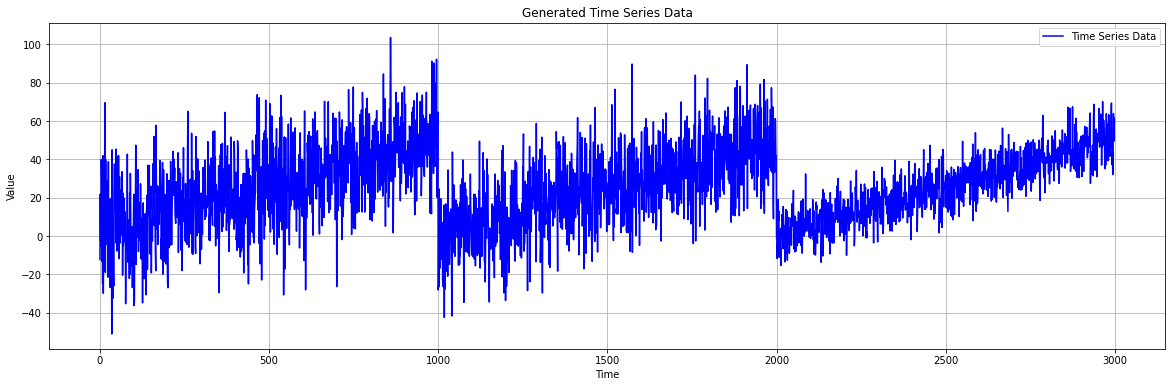

In [55]:
# Generate time series data with change points
generator = ChangePointGenerator(num_segments=3, segment_length=1000, change_point_type='gradual_drift')
generator.generate_data()

# Plot the generated data
generator.plot_data()

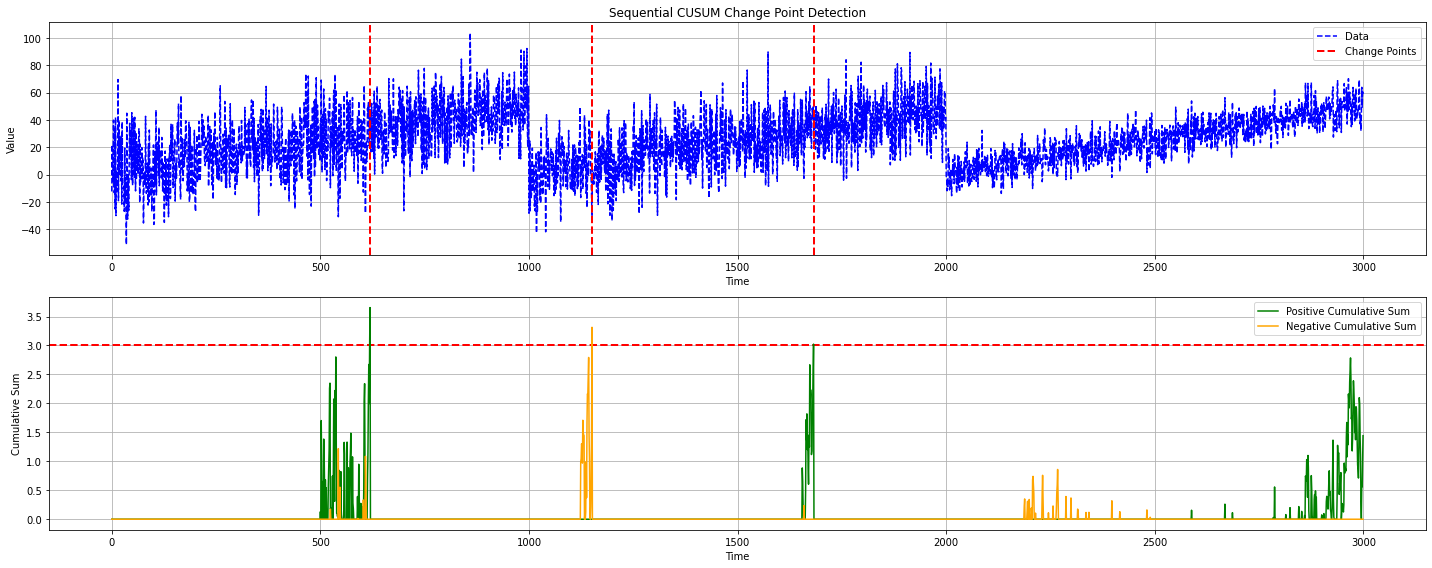

In [56]:
# Detect change points using CUSUM Detector
cusum_detector = CUSUM_Detector(warmup_period=500, delta=1, threshold=3)
cusum_pos_changes, cusum_neg_changes, cusum_change_points = cusum_detector.detect_change_points(np.array(generator.data))

# Plot the detected change points using CUSUM Detector
cusum_detector.plot_change_points(generator.data, cusum_change_points, cusum_pos_changes, cusum_neg_changes)

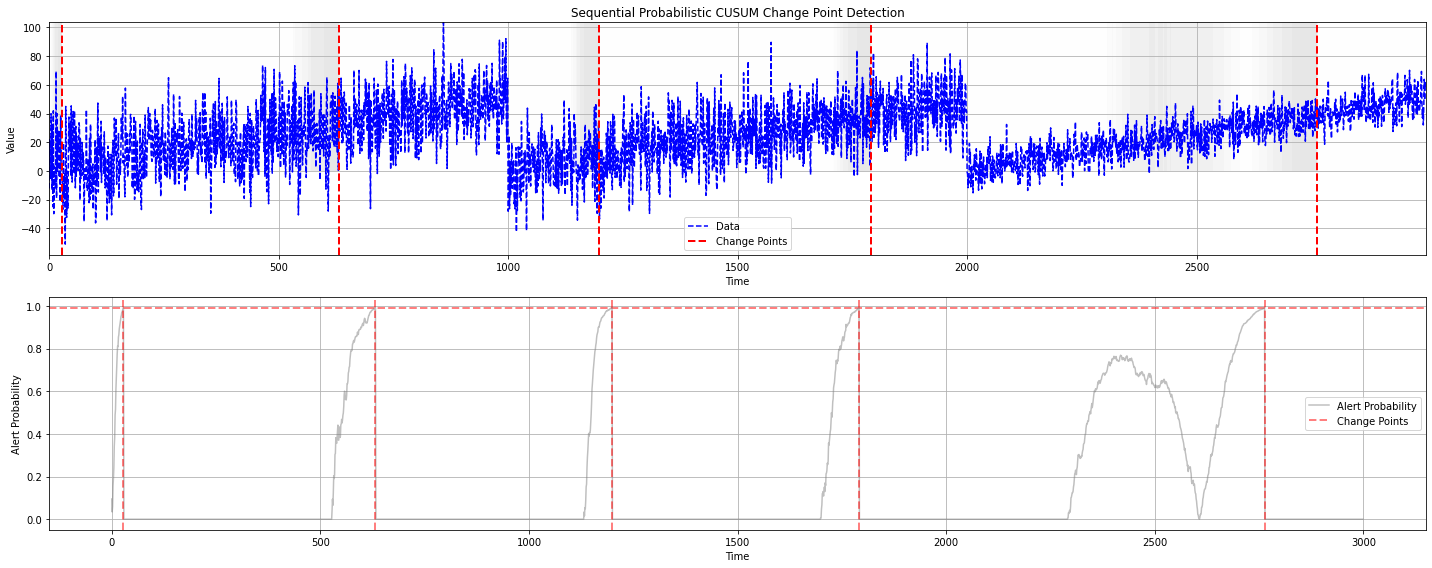

In [57]:
# Detect change points using Probabilistic CUSUM Detector
prob_cususm_detector = ProbCUSUM_Detector(warmup_period=500, threshold_probability=0.01)
prob_probabilities, prob_change_points = prob_cusum_detector.detect_change_points(np.array(generator.data))

# Plot the detected change points using Probabilistic CUSUM Detector
prob_cusum_detector.plot_change_points(generator.data, prob_change_points, prob_probabilities)

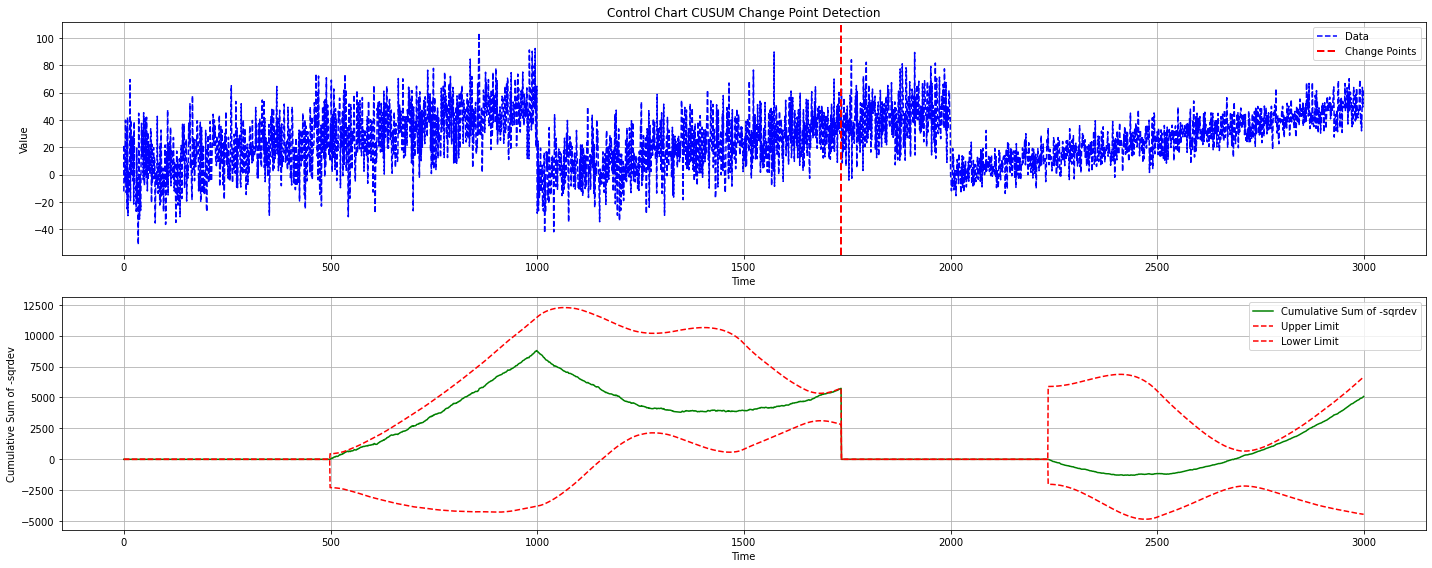

In [60]:
# Detect change points using Control Chart CUSUM Detector
chart_cusum_detector = ChartCUSUM_Detector(warmup_period=100, level=3, deviation_type='-sqrdev')
upper_limits, lower_limits, cusums, change_points = chart_cusum_detector.detect_change_points(np.array(generator.data))

# Plot the detected change points using Control Chart CUSUM Detector
chart_cusum_detector.plot_change_points(np.array(generator.data), change_points, cusums, upper_limits, lower_limits)

# Data with RANDOM missing values

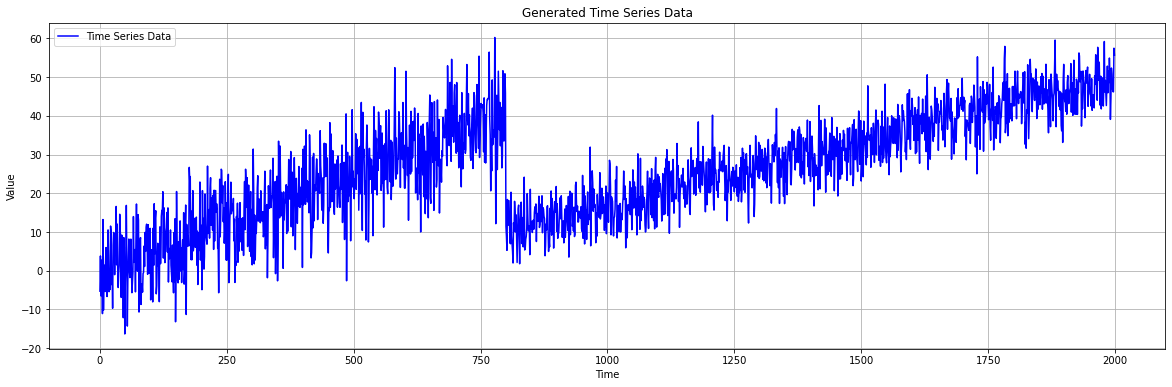

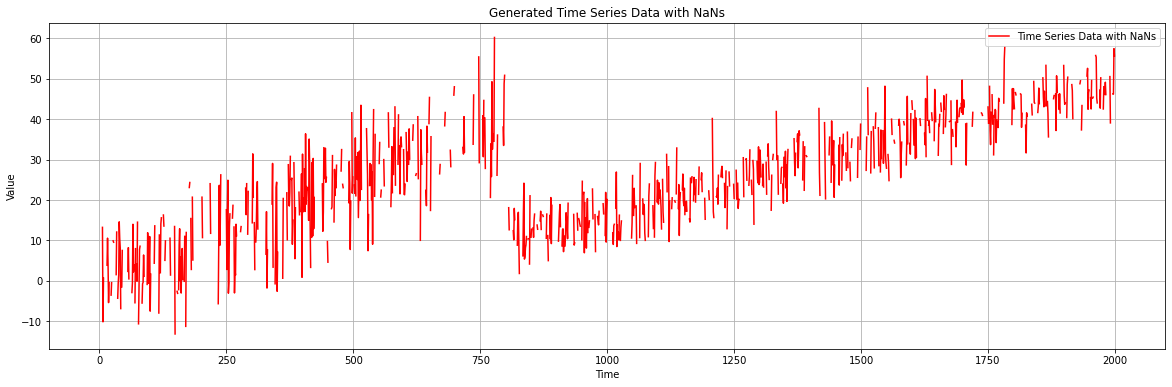

In [44]:
generator = ChangePointGenerator(num_segments=2, segment_length=1000, change_point_type='gradual_drift')
generator.generate_data()
generator.add_gradual_drift(10, 50, 5, 800)
generator.plot_data()

nan_percentage = 0.45
data_with_nans = generator.generate_random_nans(nan_percentage)
generator.plot_data_with_nans(data_with_nans)

# Data with NOT RANDOM missing values

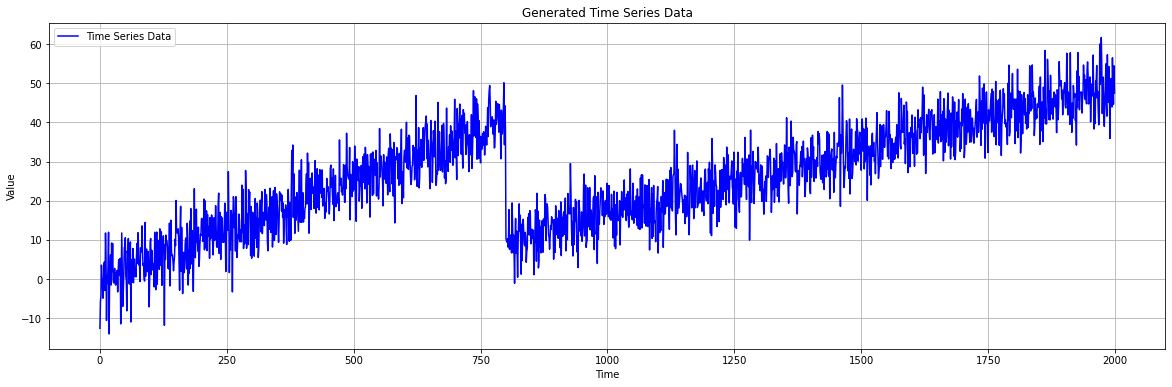

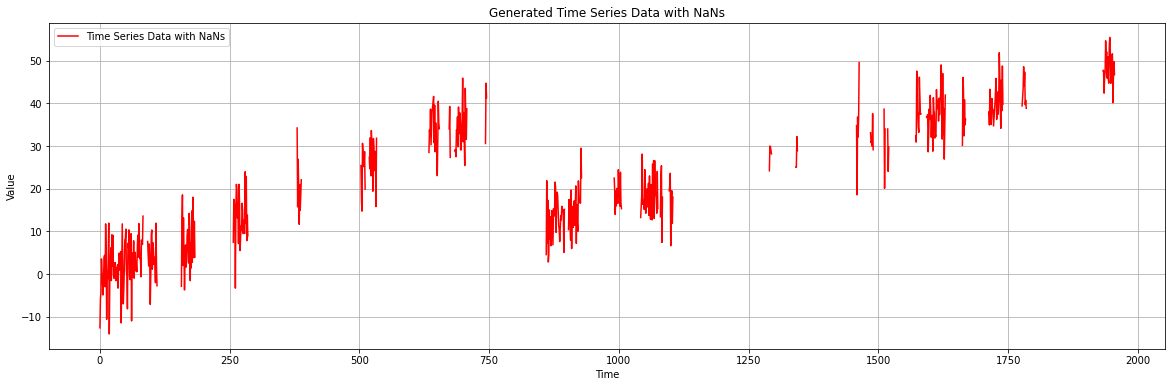

In [45]:
generator = ChangePointGenerator(num_segments=2, segment_length=1000, change_point_type='gradual_drift')
generator.generate_data()
generator.add_gradual_drift(10, 50, 5, 800)
generator.plot_data()

nan_percentage = 0.1
min_block_size=2 
max_block_size=50
data_with_nans = generator.generate_no_random_nans(nan_percentage, min_block_size, max_block_size)
generator.plot_data_with_nans(data_with_nans)